In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df = customer_df.drop(['Customer'], axis=1)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null   i

In [5]:
customer_df.isnull().sum()/len(customer_df)

State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

In [6]:
#def customer_df_col(customer_df_col, columns_that_should_be_dates):

    # drop to lower case
    #my_df.columns = list(map(lambda x:x.lower(),my_df.columns))

    # replace spaces with _
    #my_df.columns = list(map(lambda x:x.replace(' ','_'),my_df.columns))

    # set 'effective_to_date' to date type
    #my_df[columns_that_should_be_dates] = pd.to_datetime(my_df[columns_that_should_be_dates])
    
    #return my_df


In [7]:
# 4. Snake style

customer_df.columns = customer_df.columns.str.replace(' ', '_')
customer_df.columns

Index(['State', 'Customer_Lifetime_Value', 'Response', 'Coverage', 'Education',
       'Effective_To_Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [8]:
# 5 date format

customer_df['Effective_To_Date'] = pd.to_datetime(customer_df['Effective_To_Date'])

In [9]:
# 6 Check NaN values per column.

customer_df.isnull().sum()/len(customer_df)

State                            0.0
Customer_Lifetime_Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective_To_Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location_Code                    0.0
Marital_Status                   0.0
Monthly_Premium_Auto             0.0
Months_Since_Last_Claim          0.0
Months_Since_Policy_Inception    0.0
Number_of_Open_Complaints        0.0
Number_of_Policies               0.0
Policy_Type                      0.0
Policy                           0.0
Renew_Offer_Type                 0.0
Sales_Channel                    0.0
Total_Claim_Amount               0.0
Vehicle_Class                    0.0
Vehicle_Size                     0.0
dtype: float64

In [10]:
# 7 Define a function that differentiates between continuous and discrete variables.
# Hint: A number of unique values might be useful.
# Store continuous data into a continuous variable and do the same for discrete and categorical.

In [11]:
def define_variable(df, unique_value_max=10):
    categorical = []
    num_continuous = []
    num_descrete = []
    for c in df.columns:
        if df[c].dtype == object:
            #print(c + " categorical")
            categorical.append(c)
        else:
            if df[c].nunique() > unique_value_max:
                #print(c + " numerical - continuous")
                num_continuous.append(c)
            else:
                #print(c + " numerical - descrete")
                num_descrete.append(c)
        # maybe print the return order for added clarity on how to use function
        # is this going to throw a fit if we dont append anything to one of the vars...checked by passing back one of the split out dfs
    return df[categorical], df[num_continuous], df[num_descrete]
cat_features, num_continuous_features, num_descrete_features = define_variable(customer_df)
cat_features2, num_continuous_features2, num_descrete_features2 = define_variable(cat_features) # check if this breaks function...
display(cat_features.head())
display(num_continuous_features)
display(num_descrete_features)

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


,Customer_Lifetime_Value,Effective_To_Date,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Total_Claim_Amount
0,2763.519279,2011-02-24,56274,69,32,5,384.811147
1,6979.535903,2011-01-31,0,94,13,42,1131.464935
2,12887.431650,2011-02-19,48767,108,18,38,566.472247
3,7645.861827,2011-01-20,0,106,18,65,529.881344
4,2813.692575,2011-02-03,43836,73,12,44,138.130879
...,...,...,...,...,...,...,...
9129,23405.987980,2011-02-10,71941,73,18,89,198.234764
9130,3096.511217,2011-02-12,21604,79,14,28,379.200000
9131,8163.890428,2011-02-06,0,85,9,37,790.784983
9132,7524.442436,2011-02-03,21941,96,34,3,691.200000


,Number_of_Open_Complaints,Number_of_Policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


In [12]:
num_continuous_features_timeless = num_continuous_features.drop(['Effective_To_Date'], axis=1)

In [13]:
# 8   For the categorical data, check if there is some kind of text in a variable so we would need to clean it
# Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

for c in cat_features.columns:
    print(c + " - " + str (cat_features[c].nunique()))
    display(cat_features[c].value_counts(dropna=False))
    print()


State - 5


California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64


Response - 2


No     7826
Yes    1308
Name: Response, dtype: int64


Coverage - 3


Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64


Education - 5


Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64


EmploymentStatus - 5


Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64


Gender - 2


F    4658
M    4476
Name: Gender, dtype: int64


Location_Code - 3


Suburban    5779
Rural       1773
Urban       1582
Name: Location_Code, dtype: int64


Marital_Status - 3


Married     5298
Single      2467
Divorced    1369
Name: Marital_Status, dtype: int64


Policy_Type - 3


Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy_Type, dtype: int64


Policy - 9


Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64


Renew_Offer_Type - 4


Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew_Offer_Type, dtype: int64


Sales_Channel - 4


Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales_Channel, dtype: int64


Vehicle_Class - 6


Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle_Class, dtype: int64


Vehicle_Size - 3


Medsize    6424
Small      1764
Large       946
Name: Vehicle_Size, dtype: int64

In [14]:
# 9 Get categorical features.

customer_df_cat = customer_df.select_dtypes('object')
customer_df_cat

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [15]:
# 10 What should we do with the customer_id column?

# I guess we can just drop that column. Because we dont need all unique column.

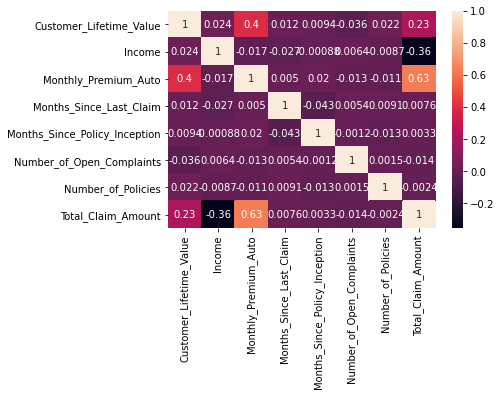

In [16]:
#Plot a correlation matrix, what can you see?

correlations_matrix = customer_df.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

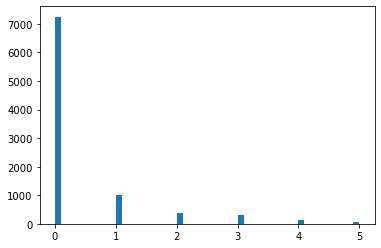

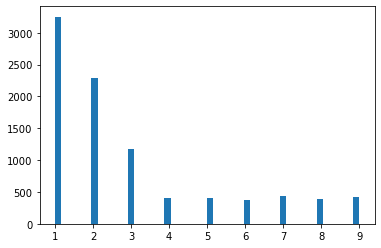

In [17]:
for b in num_descrete_features:
    plt.hist(x=b, data=num_descrete_features, bins=50)
    plt.show()

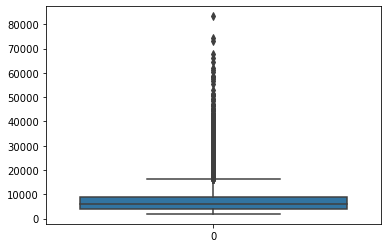

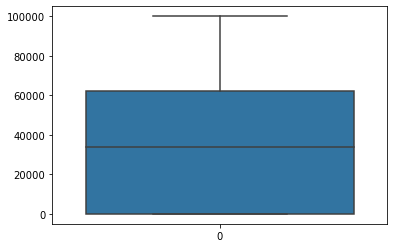

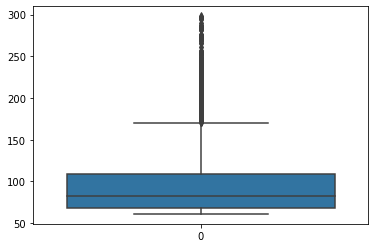

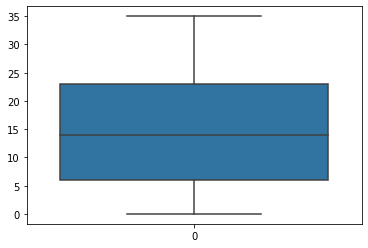

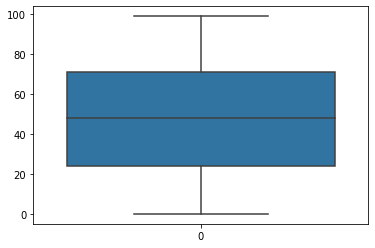

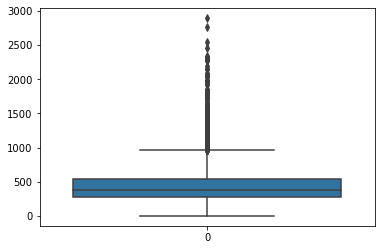

In [18]:
for col in num_continuous_features_timeless.columns :
    sns.boxplot(data = num_continuous_features_timeless[col])
    plt.show()


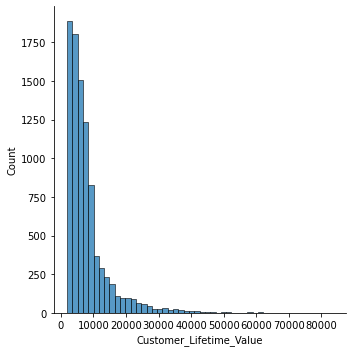

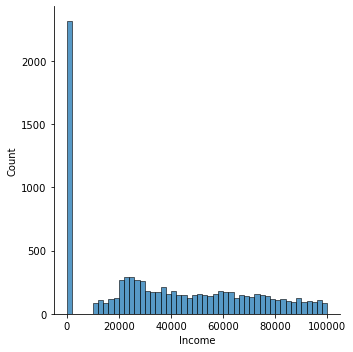

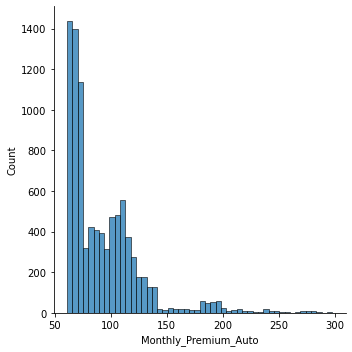

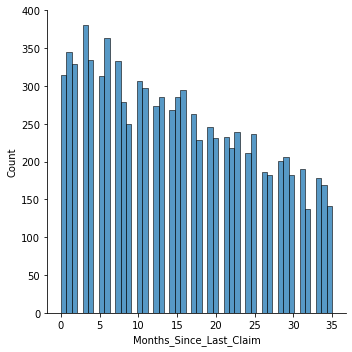

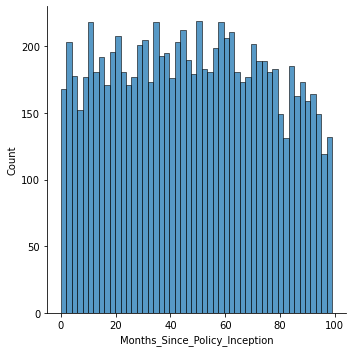

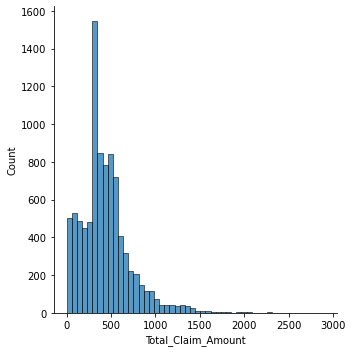

In [19]:
for b in num_continuous_features_timeless:
    sns.displot(x=b, data=num_continuous_features_timeless, bins=50)
    plt.show()

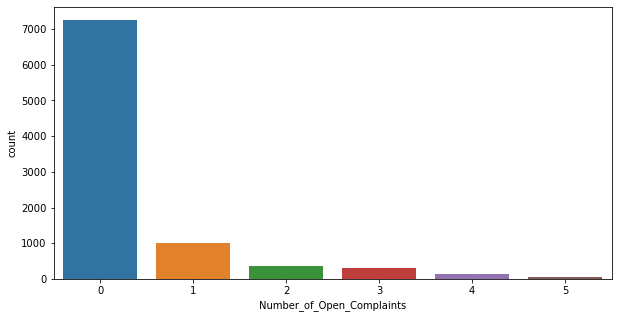

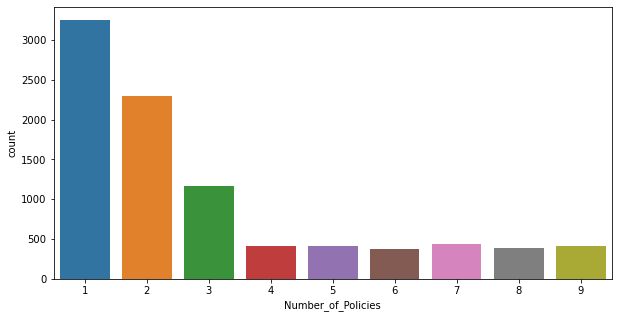

In [21]:
for col in num_descrete_features.columns :    
    plt.figure(figsize=(10,5))
    sns.countplot(x = col, data=num_descrete_features)
    plt.show()


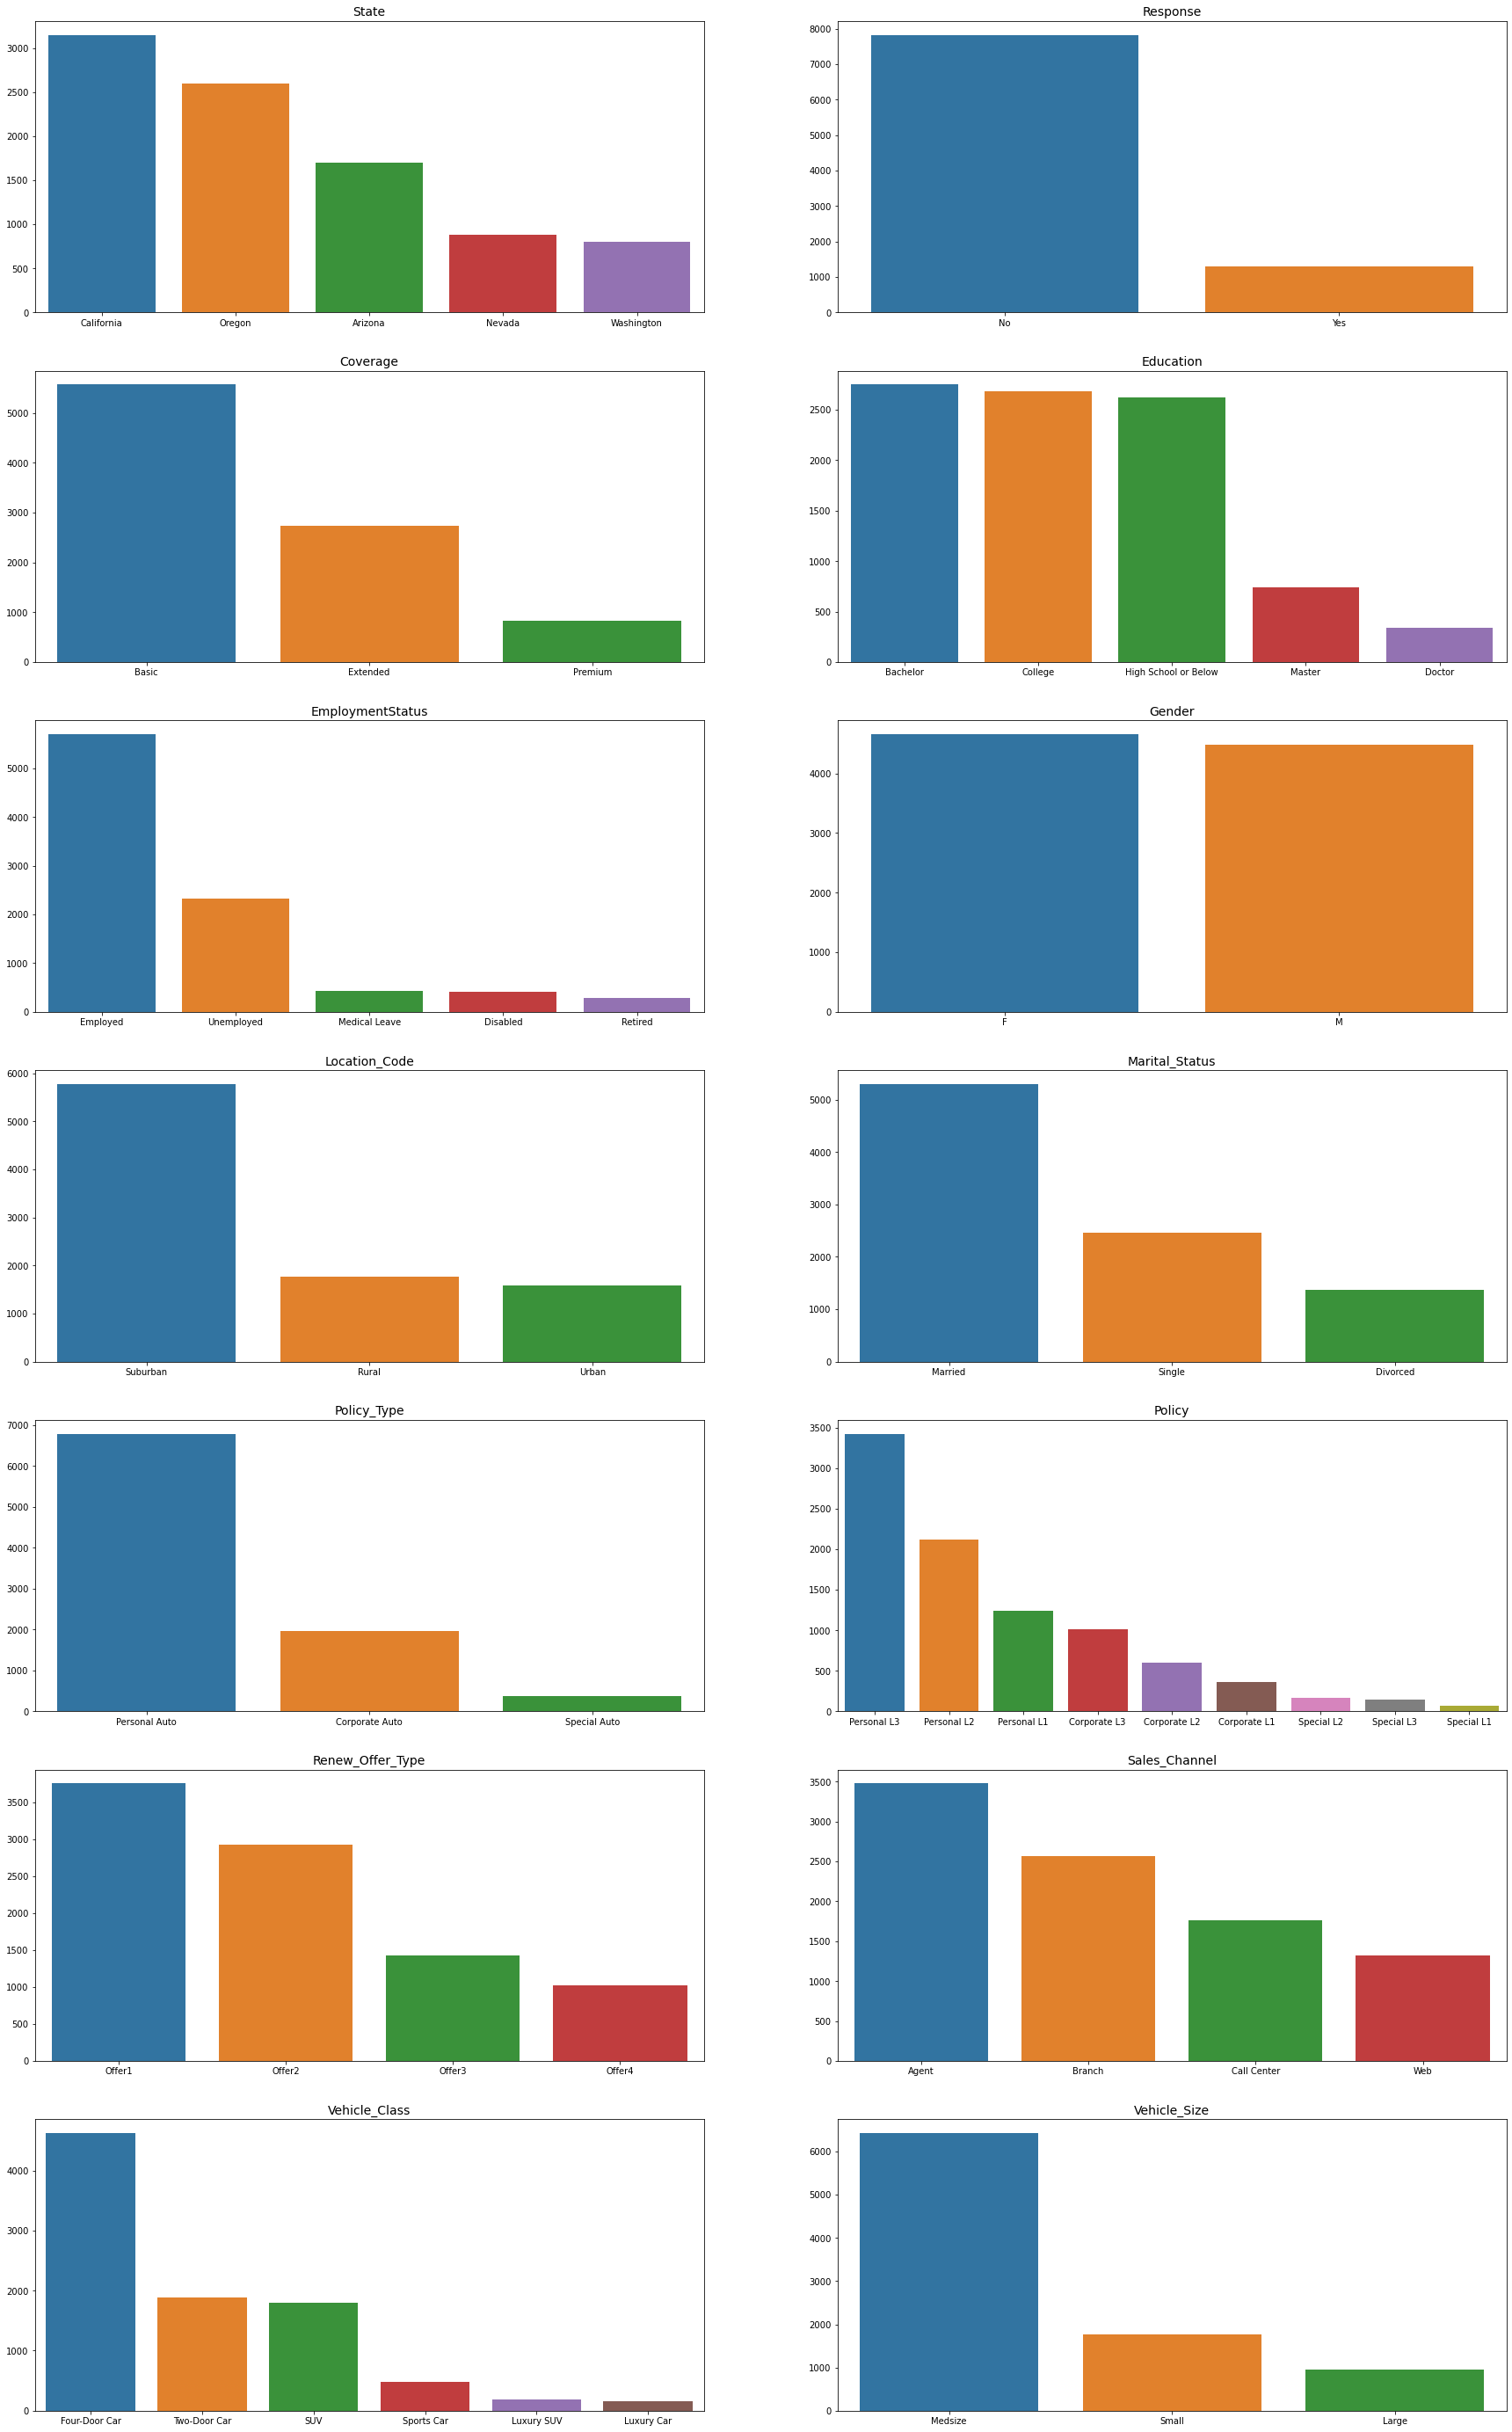

In [22]:
f, axes = plt.subplots(int(cat_features.shape[1]/2),2, figsize =(30,50))
for i, col in enumerate(cat_features):
    sns.barplot(x = cat_features[col].value_counts().index,
                y = cat_features[col].value_counts(),
                ax = axes[int(i/2)][int(i)%2])
    axes[int(i/2)][int(i)%2].set_title(col,fontsize = 14)
    axes[int(i/2)][int(i)%2].set_ylabel('')

In [23]:
def clean_employmentstatus(x):
    if x in ['Medical Leave','Disabled', 'Retired']:
        return 'Other'
    else:
        return x

<ipython-input-24-bd0da9ac3edc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_features['EmploymentStatus'] = cat_features['EmploymentStatus'].apply(clean_employmentstatus)


<AxesSubplot:ylabel='EmploymentStatus'>

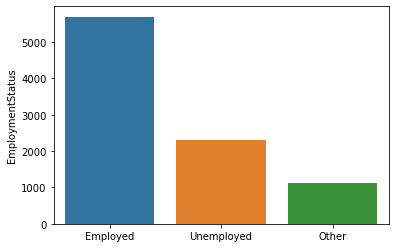

In [24]:
cat_features['EmploymentStatus'] = cat_features['EmploymentStatus'].apply(clean_employmentstatus)
sns.barplot(x=cat_features['EmploymentStatus'].value_counts().index, y=cat_features['EmploymentStatus'].value_counts())

<ipython-input-25-9d633f48598a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_features['Education'] = cat_features['Education'].apply(clean_education)


<AxesSubplot:ylabel='Education'>

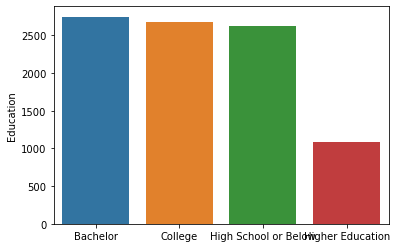

In [25]:
def clean_education(x):
    if x in ['Master','Doctor']:
        return 'Higher Education'
    else:
        return x
    
cat_features['Education'] = cat_features['Education'].apply(clean_education)
sns.barplot(x=cat_features['Education'].value_counts().index, y=cat_features['Education'].value_counts())

16414.039911750002


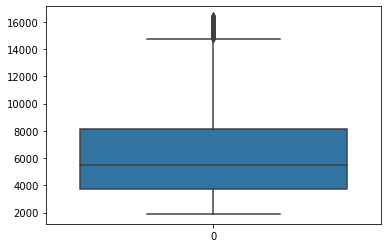

In [26]:
iqr = np.percentile(num_continuous_features['Customer_Lifetime_Value'],75) - np.percentile(num_continuous_features['Customer_Lifetime_Value'],25) 
upper_limit = np.percentile(num_continuous_features['Customer_Lifetime_Value'],75) + 1.5*iqr  
print(upper_limit)

num_continuous_features = num_continuous_features[num_continuous_features['Customer_Lifetime_Value'] < upper_limit]        

sns.boxplot(data = num_continuous_features['Customer_Lifetime_Value'])
plt.show() 

165.5


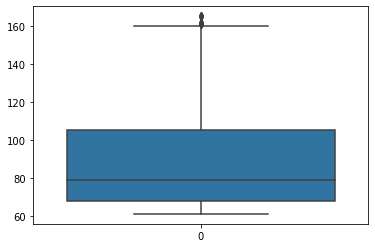

In [27]:
iqr = np.percentile(num_continuous_features['Monthly_Premium_Auto'],75) - np.percentile(num_continuous_features['Monthly_Premium_Auto'],25) 
upper_limit = np.percentile(num_continuous_features['Monthly_Premium_Auto'],75) + 1.5*iqr  
print(upper_limit)

num_continuous_features = num_continuous_features[num_continuous_features['Monthly_Premium_Auto'] < upper_limit] 

sns.boxplot(data = num_continuous_features['Monthly_Premium_Auto'])
plt.show() 

923.7096106250001


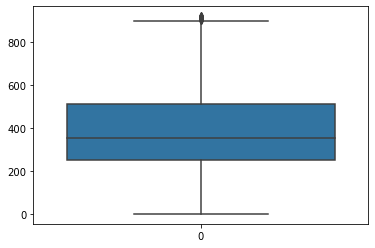

In [28]:
iqr = np.percentile(num_continuous_features['Total_Claim_Amount'],75) - np.percentile(num_continuous_features['Total_Claim_Amount'],25) 
upper_limit = np.percentile(num_continuous_features['Total_Claim_Amount'],75) + 1.5*iqr  
print(upper_limit)

num_continuous_features = num_continuous_features[num_continuous_features['Total_Claim_Amount'] < upper_limit] 

sns.boxplot(data = num_continuous_features['Total_Claim_Amount'])
plt.show()

## Lab | Feature extraction

In [107]:
categoricals = cat_features.select_dtypes('object')
categoricals.head(60)

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Non personal,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Non Married,Personal Auto,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Non personal,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Non Married,Personal Auto,L1,Offer1,Agent,Four-Door Car,Medsize
5,Oregon,Yes,Basic,Bachelor,Employed,F,Rural,Married,Personal Auto,L3,Offer2,Web,Two-Door Car,Medsize
6,Oregon,Yes,Basic,College,Employed,F,Suburban,Married,Non personal,L3,Offer1,Agent,Four-Door Car,Medsize
7,Arizona,No,Premium,Higher Education,Unemployed,M,Urban,Non Married,Non personal,L3,Offer1,Agent,Four-Door Car,Medsize
8,Oregon,Yes,Basic,Bachelor,Other,M,Suburban,Non Married,Non personal,L3,Offer1,Agent,Four-Door Car,Medsize
9,Oregon,No,Extended,College,Employed,F,Urban,Married,Non personal,L2,Offer2,Branch,Four-Door Car,Medsize


<ipython-input-30-3fdf6177c3ed>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_features['Policy'] = cat_features['Policy'].apply(clean_policy)


<AxesSubplot:ylabel='Policy'>

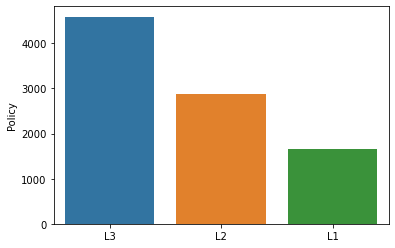

In [30]:
def clean_policy(x):
    if x in ['Personal L1','Special L1', 'Corporate L1']:
        return 'L1'
    if x in ['Personal L2','Special L2', 'Corporate L2']:
        return 'L2'
    if x in ['Personal L3','Special L3', 'Corporate L3']:
        return 'L3'
    else:
        return x
    
cat_features['Policy'] = cat_features['Policy'].apply(clean_policy)
sns.barplot(x=cat_features['Policy'].value_counts().index, y=cat_features['Policy'].value_counts())

<ipython-input-31-6e7449094e50>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_features['Vehicle_Class'] = cat_features['Vehicle_Class'].apply(clean_Vehicle_Class)


<AxesSubplot:ylabel='Vehicle_Class'>

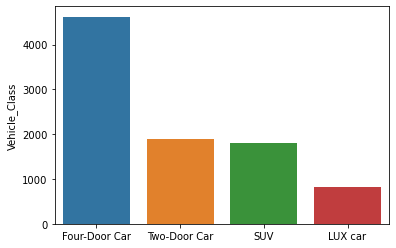

In [31]:
def clean_Vehicle_Class(x):
    if x in ['Sports Car','Luxury SUV', 'Luxury Car']:
        return 'LUX car'
    else:
        return x
    
cat_features['Vehicle_Class'] = cat_features['Vehicle_Class'].apply(clean_Vehicle_Class)
sns.barplot(x=cat_features['Vehicle_Class'].value_counts().index, y=cat_features['Vehicle_Class'].value_counts())

<ipython-input-32-31e66296365b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_features['Marital_Status'] = cat_features['Marital_Status'].apply(clean_maritalstatus)


<AxesSubplot:ylabel='Marital_Status'>

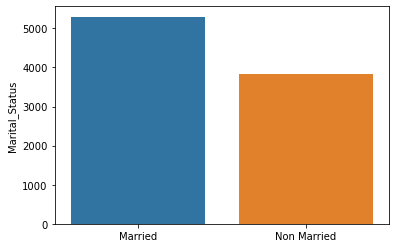

In [32]:
def clean_maritalstatus(x):
    if x in ['Single', 'Divorced']:
        return 'Non Married'
    else:
        return x   
cat_features['Marital_Status'] = cat_features['Marital_Status'].apply(clean_maritalstatus)
sns.barplot(x=cat_features['Marital_Status'].value_counts().index, y=cat_features['Marital_Status'].value_counts())

<ipython-input-33-07244e41b3f0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_features['Policy_Type'] = cat_features['Policy_Type'].apply(clean_policy_type)


<AxesSubplot:ylabel='Policy_Type'>

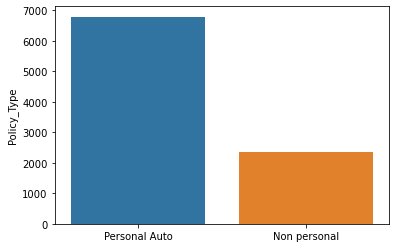

In [33]:
def clean_policy_type(x):
    if x in ['Corporate Auto', 'Special Auto']:
        return 'Non personal'
    else:
        return x   
cat_features['Policy_Type'] = cat_features['Policy_Type'].apply(clean_policy_type)
sns.barplot(x=cat_features['Policy_Type'].value_counts().index, y=cat_features['Policy_Type'].value_counts())

In [34]:
num_continuous_features[['Effective_To_Date']].value_counts()

Effective_To_Date
2011-01-10           171
2011-01-27           169
2011-02-14           167
2011-01-19           158
2011-01-20           152
2011-01-17           152
2011-01-03           150
2011-02-27           149
2011-01-26           148
2011-01-28           147
2011-01-31           147
2011-02-03           146
2011-02-19           143
2011-01-21           141
2011-01-29           140
2011-02-26           140
2011-01-11           139
2011-02-05           137
2011-02-04           136
2011-02-07           136
2011-02-28           136
2011-01-02           135
2011-01-18           134
2011-01-08           134
2011-02-12           133
2011-01-07           133
2011-02-21           132
2011-01-23           132
2011-02-25           131
2011-01-05           131
2011-02-02           130
2011-02-11           130
2011-01-13           130
2011-01-25           130
2011-01-09           129
2011-02-23           129
2011-02-22           129
2011-02-10           129
2011-02-01           128
2011-01

In [ ]:
#num_continuous_features['January'] = num_continuous_features['Effective_To_Date'] == 

#def time_month(x):
    #num_continuous_features['January'] = []
    #for x in num_continuous_features['Effective_To_Date']:
        #if num_continuous_features['Effective_To_Date'][x] < 2011-02-01:
            #num_continuous_features['January'].append(x)
    #return num_continuous_features['January']


    

In [ ]:
#num_continuous_features[['Effective_To_Date']]

In [ ]:
#num_continuous_features['January'] = num_continuous_features['Effective_To_Date'] < '2011-02-01'
#num_continuous_features['January']

In [ ]:
#num_continuous_features['January'].value_counts()

<ipython-input-35-270718b4688f>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  date_time['week'] = num_continuous_features['Effective_To_Date'].dt.week


<AxesSubplot:xlabel='day', ylabel='target'>

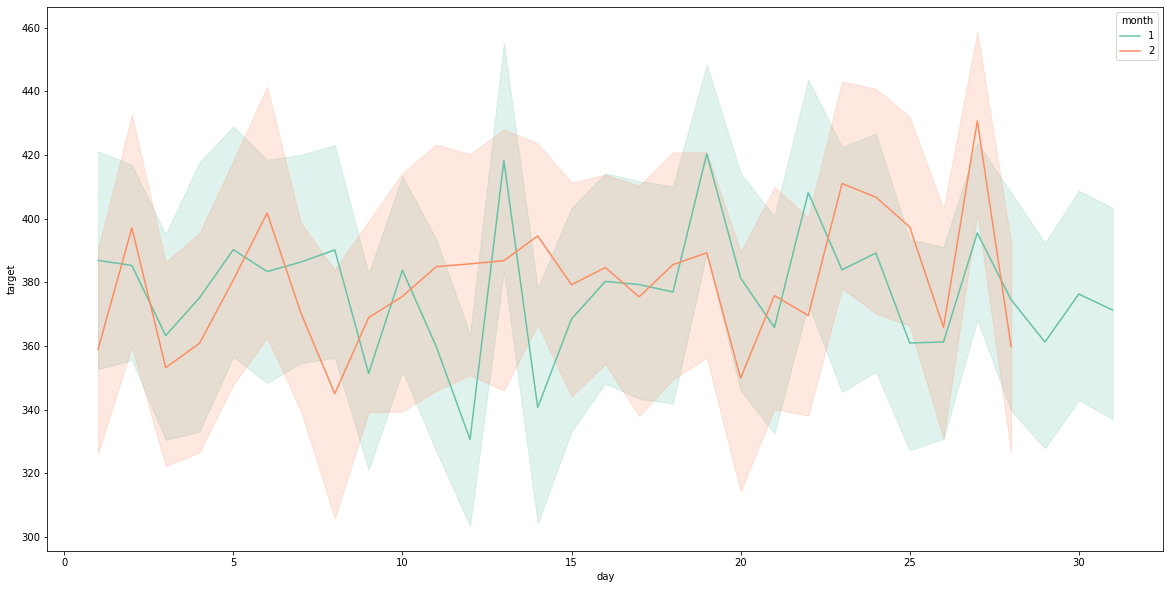

In [35]:
date_time = pd.DataFrame()
date_time['day'] = num_continuous_features['Effective_To_Date'].dt.day
date_time['week'] = num_continuous_features['Effective_To_Date'].dt.week
date_time['month'] = num_continuous_features['Effective_To_Date'].dt.month
date_time['target'] = num_continuous_features['Total_Claim_Amount']
plt.figure(figsize=(20,10))
sns.lineplot(x=date_time.day, y=date_time.target, hue = date_time.month, palette='Set2')

In [ ]:
# i wanted to with the group by.. but somehow i couldnt execute it.. so i used this lineplot to plot the time.

In [36]:
customer_df_num = customer_df.select_dtypes('number')
customer_df_num

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [37]:
X = customer_df_num.drop(['Total_Claim_Amount'],axis=1)
y = customer_df_num['Total_Claim_Amount']

In [38]:
X

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1
...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2
9130,3096.511217,21604,79,14,28,0,1
9131,8163.890428,0,85,9,37,3,2
9132,7524.442436,21941,96,34,3,0,3


In [39]:
customer_df_num

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [40]:
# Normalize (numerical continuous)


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Minmaxtransformer = MinMaxScaler().fit(X)
list_normalized = Minmaxtransformer.transform(X)
list_normalized

data_normalized = pd.DataFrame(list_normalized, columns=X.columns) 
data_normalized

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000
...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250


In [41]:
# Standart Scaling

stransformer = StandardScaler().fit(customer_df_num)
scaled = pd.DataFrame(stransformer.transform(customer_df_num),columns=customer_df_num.columns)
scaled

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.422250,-0.822648,-0.169640
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.422250,2.106160,2.400737
2,0.710636,0.365710,0.429596,0.288205,-0.360680,-0.422250,-0.404247,0.455734
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.422250,1.687759,0.329769
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-0.422250,-0.822648,-1.018843
...,...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,-0.422250,-0.404247,-0.811934
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,-0.422250,-0.822648,-0.188956
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,2.873245,-0.404247,1.227937
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,-0.422250,0.014154,0.885113


In [42]:
data = customer_df
data['month'] = data['Effective_To_Date'].dt.month
data['day'] = data['Effective_To_Date'].dt.day
data = data.drop(['Effective_To_Date'], axis = 1)
data

,State,Customer_Lifetime_Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,...,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,month,day
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2,24
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1,31
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2,19
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1,20
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2,10
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2,12
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2,6
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2,3


In [43]:
# Encoding the categoricals

from sklearn.preprocessing import OneHotEncoder
categoricals.shape

(9134, 14)

In [44]:
df = pd.DataFrame()
for col in categoricals.columns:
    encoder = OneHotEncoder().fit(categoricals[[col]])
    #print(encoder.categories_)
    encoded = encoder.transform(categoricals[[col]]).toarray()
    #print(encoded)
    onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
    #onehot_encoded.head()
    df=pd.concat([df,onehot_encoded], axis=1)
df.head()

,Arizona,California,Nevada,Oregon,Washington,No,Yes,Basic,Extended,Premium,...,Web,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car,Large,Medsize,Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
X = np.concatenate((df,data_normalized),axis=1)

## Lab | Comparing regression models

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 61)
(1827, 61)
(7307,)
(1827,)


In [64]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

predictions = lm.predict(X_train)
r2_score(y_train, predictions)
# R2.

0.7741536634825156

In [65]:
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.7626486306742002

In [96]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsRegressor()

In [97]:
score = KNN.score(X_test, y_test)
score

0.6465637672895663

In [68]:
LR = LinearRegression().fit(X_train,y_train)
y_pred = LR.predict(X_test)
r2_score(y_pred,y_test)

0.7024234291585623

In [99]:
from sklearn.neural_network import MLPRegressor

In [105]:
mlp = MLPRegressor(random_state=42, activation="identity")
mlp.fit(X_train, y_train)

C:\Users\Tekin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='identity', random_state=42)

In [106]:
score_mlp = mlp.score(X_test, y_test)
score_mlp

0.7530443732376265

In [ ]:
# Bonus question

import scipy.stats as st
cat_features.columns

In [ ]:
data_1 = pd.crosstab(cat_features['Education'], cat_features['Vehicle_Size'], margins = False)
print('p val Education - Vehicle_Size', round(st.chi2_contingency(data_1)[1],3))
#p is high, H0 MUST STAY!

In [ ]:
data_2 = pd.crosstab(cat_features['Location_Code'], cat_features['Coverage'], margins = False)
print('p val location_code - coverage', round(st.chi2_contingency(data_2)[1],3))
#p is low, H0 MUST GO!